In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def ext(path):
    txt = open(path, 'r')
    lines = txt.readlines()
    df = pd.DataFrame()
    for line in tqdm(lines):
        df = pd.concat([df, pd.DataFrame(np.array(line.replace(',', '').replace('\n', '').split(' ')).reshape(1, -1))])
    df = df.reset_index(drop=True)
    df.columns = ['Date', 'Timestamp', 'Leg-1', 'Leg-2', 'Conv']
    return df

In [2]:
df = ext('/content/trail1.txt')

100%|██████████| 38963/38963 [01:15<00:00, 518.61it/s]


In [3]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(40, 10))
#df.loc[lambda d: d.Date.isin(['2017/08/06']), :]['Leg-2'].astype(float).plot()
#plt.show()

In [4]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [5]:
def ConvResamp(df, timeframe):
    dfNew = df.copy()
    df.loc[:,'DateTime'] = pd.to_datetime(df.Date.astype(str) + ' ' + df.Timestamp.astype(str), errors='coerce')
    df.set_index('DateTime', append=False, inplace=True)

    conv = {                                                                                                             
              'Timestamp':'last',                                                                                                    
              'Leg-1':'last',                                                                                                       
              'Leg-2':'last',                                                                                                        
              'Conv': 'last'
          }

    dfNew = df.resample(timeframe).agg(conv)
    dfNew.dropna(inplace = True)
    dfNew.columns = ['Timestamp', 'Leg-1', 'Leg-2', 'Conv']
    dfNew[['Leg-1', 'Leg-2', 'Conv']] = dfNew[['Leg-1', 'Leg-2', 'Conv']].astype(float)
    return dfNew

In [36]:
import plotly.graph_objects as go
def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]
    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

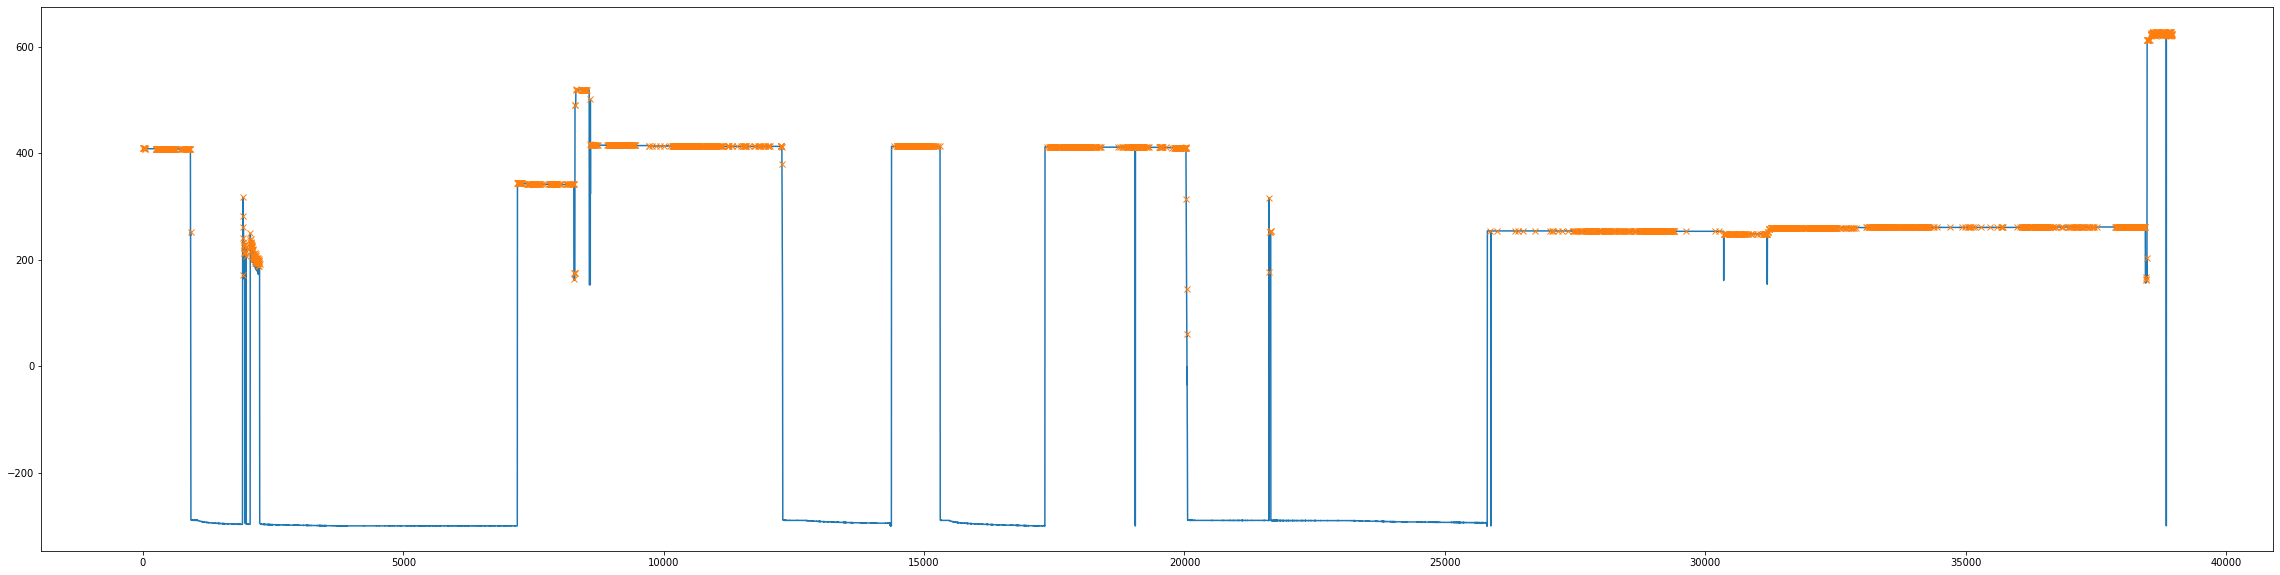

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ConvResamp(df, '1min')['Timestamp'].values,
    y=smoothTriangle(ConvResamp(df, '1min')['Conv'].values, 5),  # setting degree to 10
    mode='markers',
    marker=dict(
        size=5,
        color='#C190F0',
        symbol='triangle-up'
    )))

fig.show()
plt.figure(figsize=(40, 10))
peaks, pts = find_peaks(ConvResamp(df, '1min')['Conv'], distance=1, height=5)
plt.plot(ConvResamp(df, '1min')['Conv'].values)
plt.plot(peaks, np.array(ConvResamp(df, '1min')['Conv'])[peaks], "x")

plt.show()

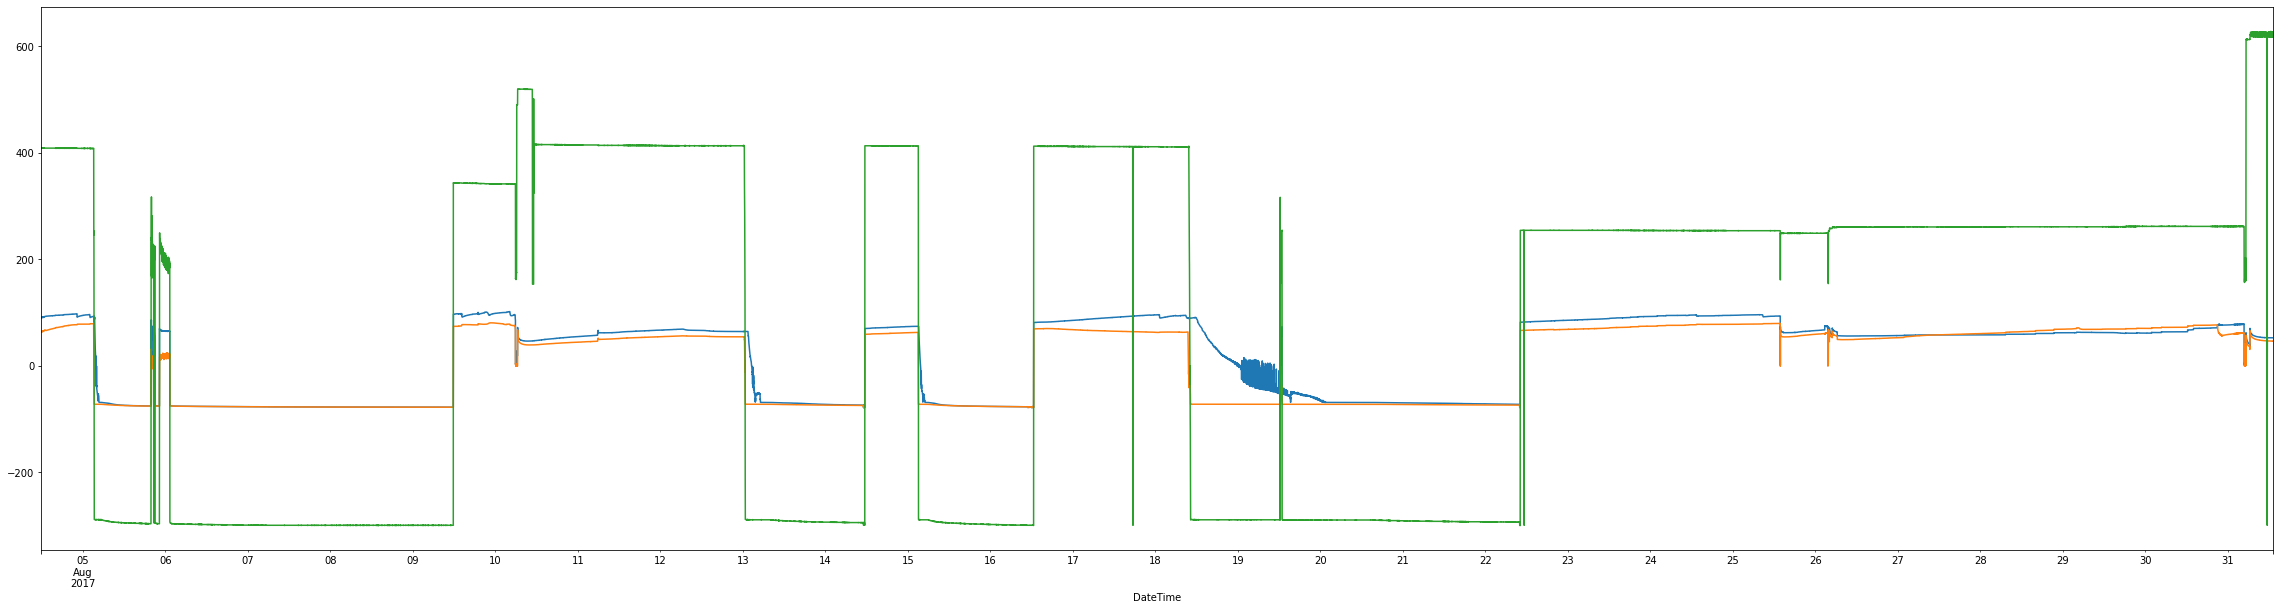

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
ConvResamp(df, '1min')['Leg-2'].plot()
ConvResamp(df, '1min')['Leg-1'].plot()
ConvResamp(df, '1min')['Conv'].plot()
plt.show()

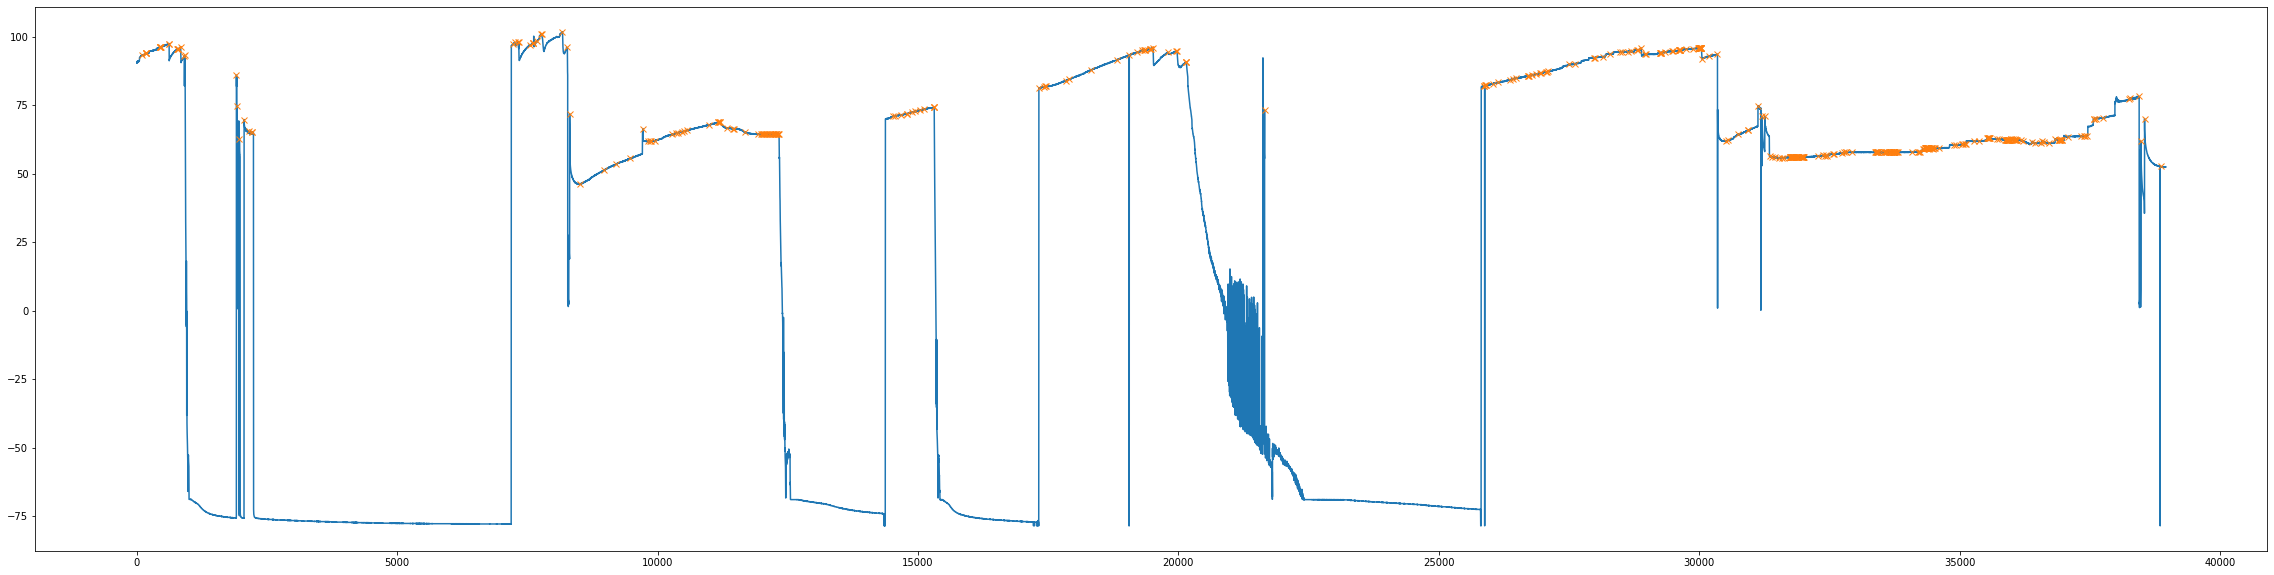

In [38]:
plt.figure(figsize=(40, 10))
peaks, pts = find_peaks(ConvResamp(df, '1min')['Leg-2'], distance=1, height=df['Leg-2'].astype('float').mean(), width=7)
plt.plot(ConvResamp(df, '1min')['Leg-2'].values)
plt.plot(peaks, np.array(ConvResamp(df, '1min')['Leg-2'])[peaks], "x")

plt.show()

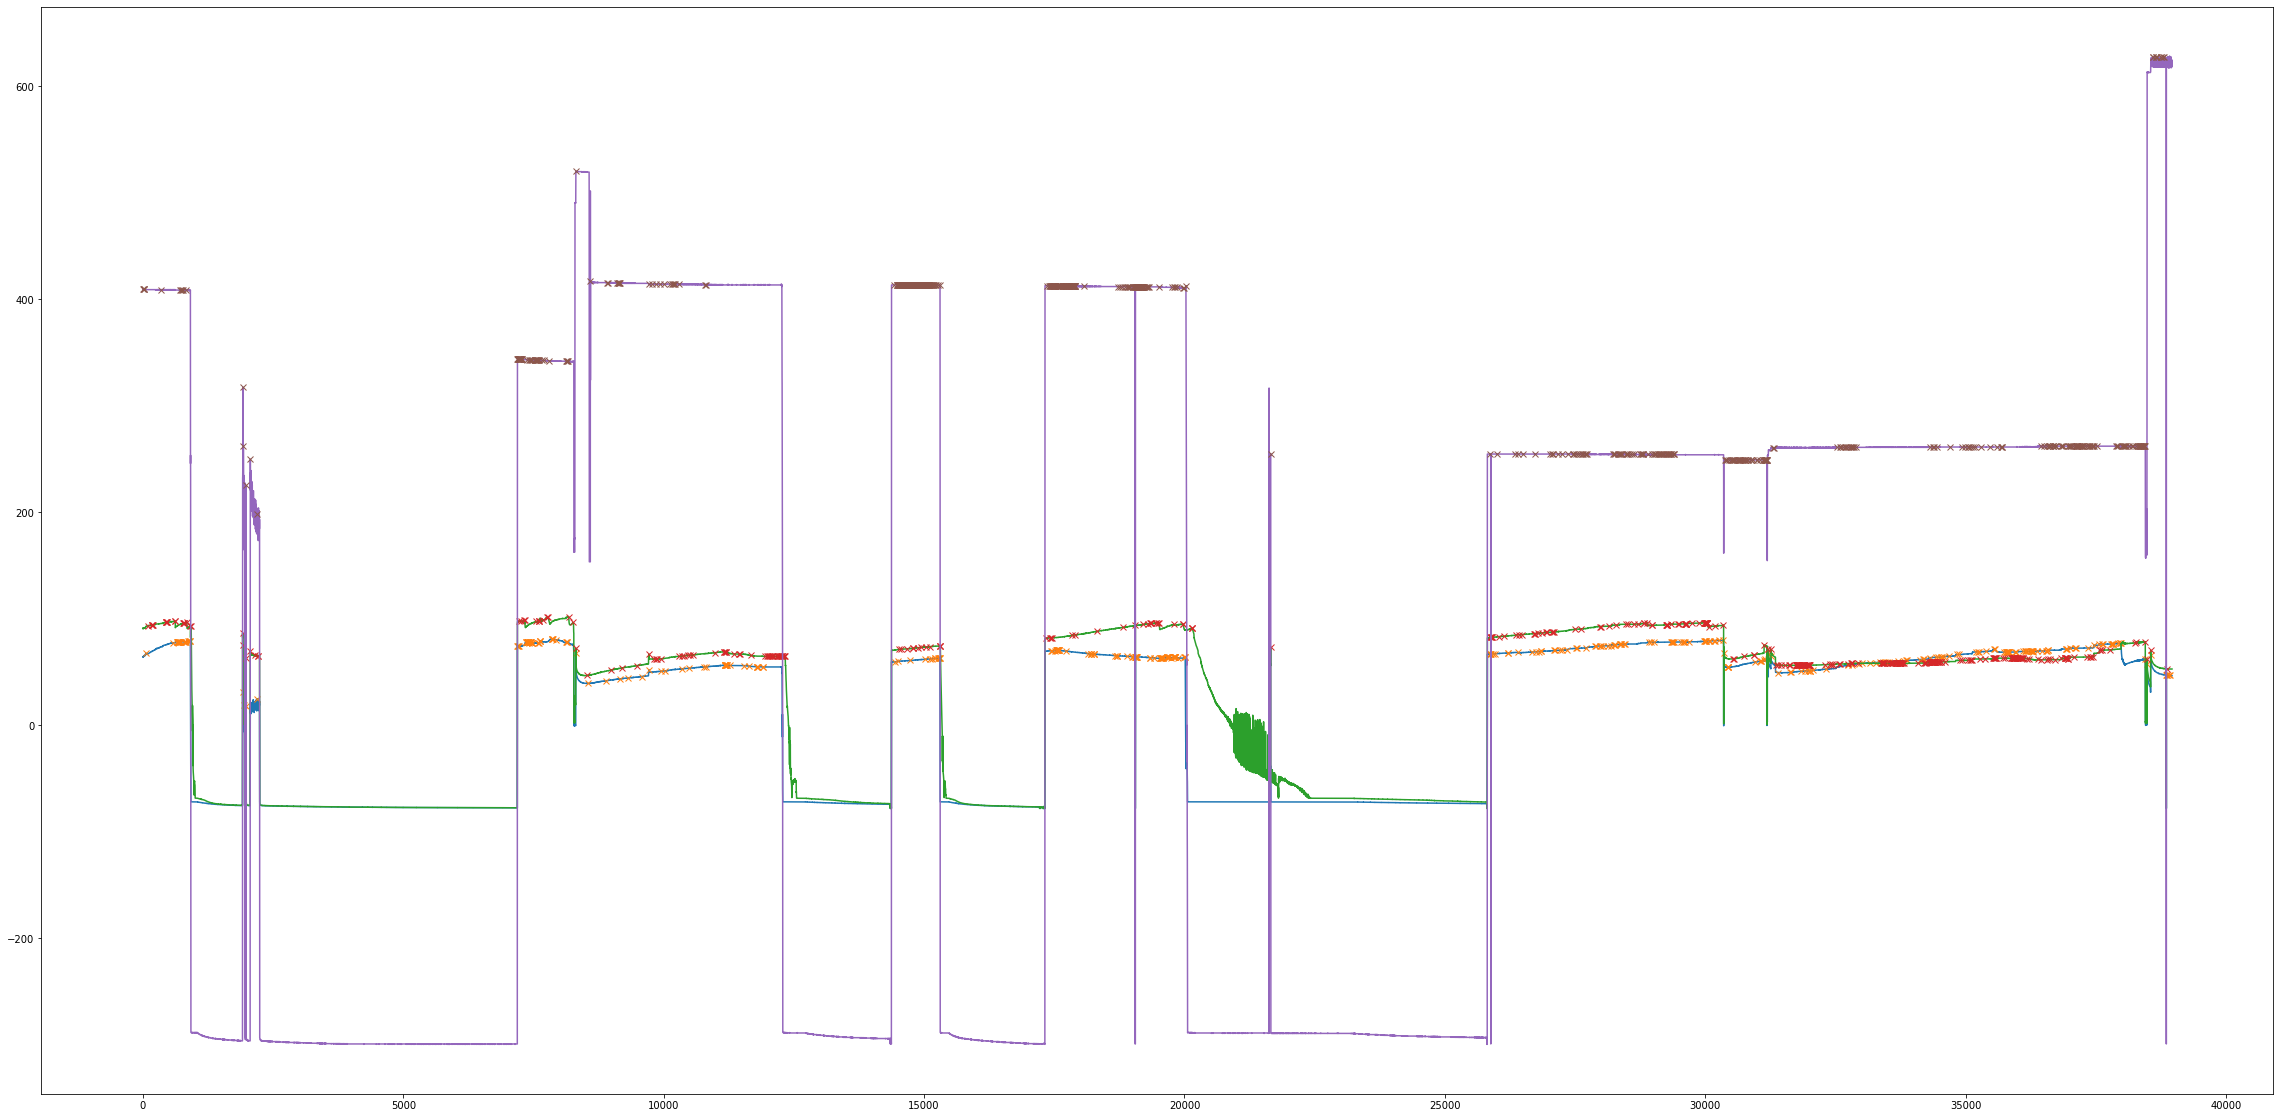

In [41]:
plt.figure(figsize=(40, 20))
peaks1, pts1 = find_peaks(ConvResamp(df, '1min')['Leg-1'], distance=1, height=df['Leg-1'].astype('float').mean(), width=7)
plt.plot(ConvResamp(df, '1min')['Leg-1'].values)
plt.plot(peaks1, np.array(ConvResamp(df, '1min')['Leg-1'])[peaks1], "x")
peaks, pts = find_peaks(ConvResamp(df, '1min')['Leg-2'], distance=1, height=df['Leg-2'].astype('float').mean(), width=7)
plt.plot(ConvResamp(df, '1min')['Leg-2'].values)
plt.plot(peaks, np.array(ConvResamp(df, '1min')['Leg-2'])[peaks], "x")
peaks2, pts2 = find_peaks(ConvResamp(df, '1min')['Conv'], distance=1, height=df['Conv'].astype('float').mean(), width=7)
plt.plot(ConvResamp(df, '1min')['Conv'].values)
plt.plot(peaks2, np.array(ConvResamp(df, '1min')['Conv'])[peaks2], "x")

plt.show()

In [ ]:
peaks

array([    2,     4,     8, ..., 38941, 38945, 38954])

In [ ]:
df.loc[lambda d: d.Date.isin(['2017/08/05', '2017/08/06', '2017/08/07', '2017/08/08', '2017/08/09']), :]

,Date,Timestamp,Leg-1,Leg-2,Conv
DateTime,,,,,
2017-08-05 00:00:10,2017/08/05,0:00:10,78.22,94.75,408.4
2017-08-05 00:01:10,2017/08/05,0:01:10,78.22,94.65,408.4
2017-08-05 00:02:10,2017/08/05,0:02:10,78.22,94.65,408.4
2017-08-05 00:03:10,2017/08/05,0:03:10,78.22,94.75,408.4
2017-08-05 00:04:10,2017/08/05,0:04:10,78.22,94.65,408.4
...,...,...,...,...,...
2017-08-09 23:55:10,2017/08/09,23:55:10,80.16,98.42,341.9
2017-08-09 23:56:10,2017/08/09,23:56:10,80.16,98.42,341.6
2017-08-09 23:57:10,2017/08/09,23:57:10,80.16,98.52,341.9


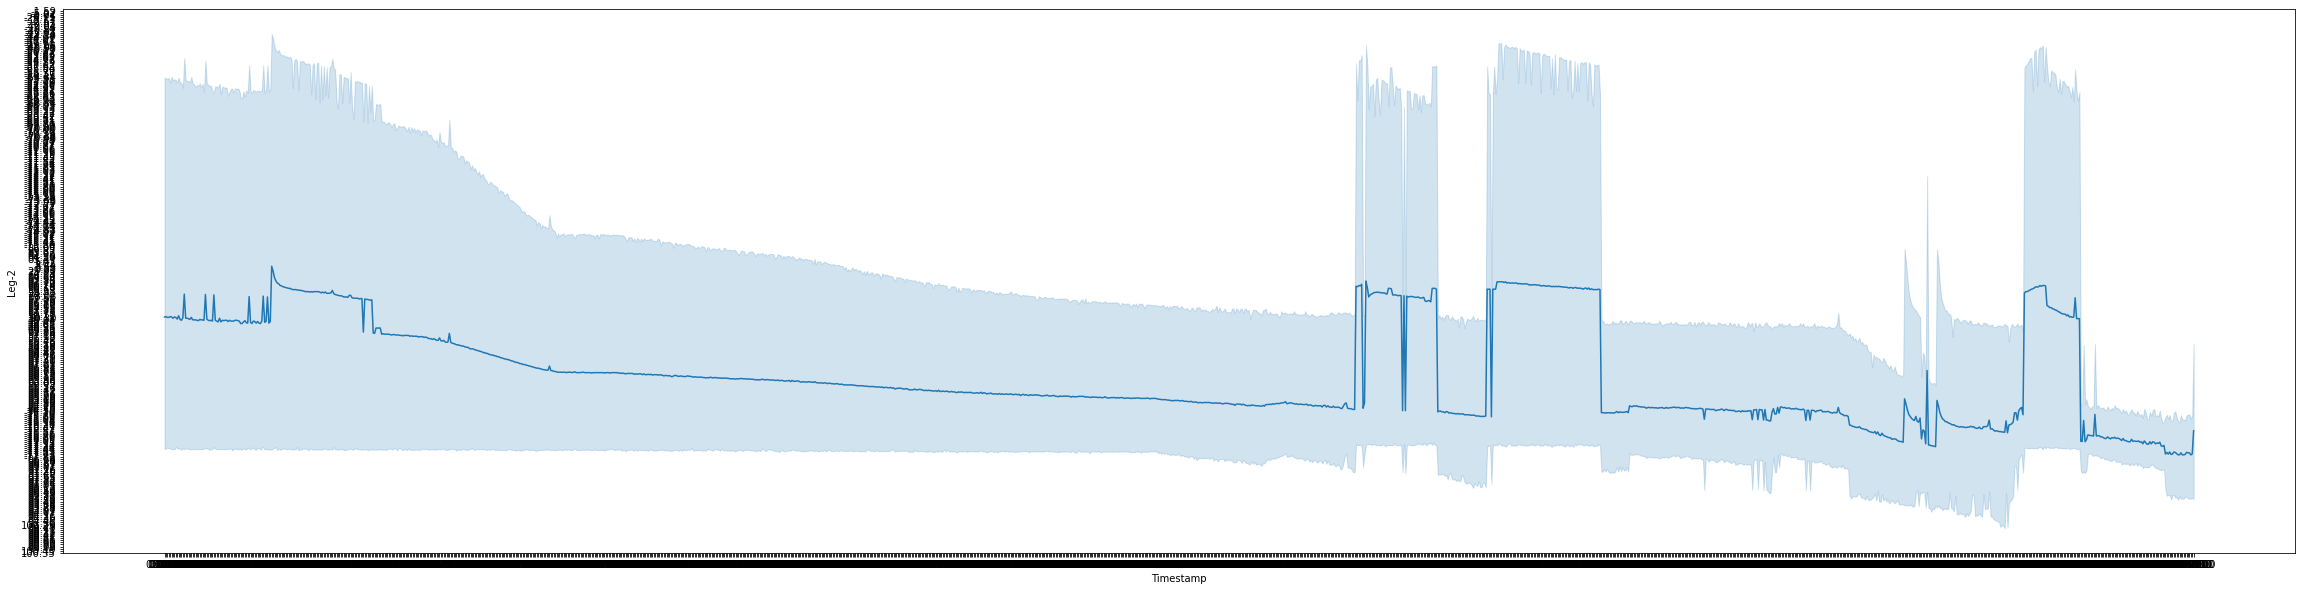

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
sns.lineplot(x='Timestamp', y='Leg-2', data=df.loc[lambda d: d.Date.isin(['2017/08/05', '2017/08/06', '2017/08/07', '2017/08/08', '2017/08/09']), :])
plt.show()

In [ ]:
df.loc[lambda d: d.Date.isin(['2017/08/05', '2017/08/06', '2017/08/07', '2017/08/08', '2017/08/09']), :]

,Date,Timestamp,Leg-1,Leg-2,Conv
DateTime,,,,,
2017-08-05 00:00:10,2017/08/05,0:00:10,78.22,94.75,408.4
2017-08-05 00:01:10,2017/08/05,0:01:10,78.22,94.65,408.4
2017-08-05 00:02:10,2017/08/05,0:02:10,78.22,94.65,408.4
2017-08-05 00:03:10,2017/08/05,0:03:10,78.22,94.75,408.4
2017-08-05 00:04:10,2017/08/05,0:04:10,78.22,94.65,408.4
...,...,...,...,...,...
2017-08-09 23:55:10,2017/08/09,23:55:10,80.16,98.42,341.9
2017-08-09 23:56:10,2017/08/09,23:56:10,80.16,98.42,341.6
2017-08-09 23:57:10,2017/08/09,23:57:10,80.16,98.52,341.9
